### 1 - Creating initial partitions to load saved ensembles created from GerryChain

In [16]:
import yaml
from iowa import *

with open('settings.yaml', 'r') as stream:
    settings = yaml.load(stream)

graph = Graph.from_file(settings['data_path_shp'], reproject=False)

partitions = MC_sample(graph, settings, save_part=False)

/anaconda3/envs/VRDI/lib/python3.7/site-packages/ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


computed initial partition
Markov chain step 0


### 2 - load saved partitions 

### 2.1 - flip run of 25000 steps on Iowa, where we take every 100th step to get 250 total plans

In [17]:
import json
import save_data as sd

In [18]:
flip_data = sd.load_run('./Data/flip_iowa_25000_100_version2.json',partitions[0])

In [19]:
election_names = ["PRES00","PRES04","PRES08","PRES12"]
seats_rep_flip=[]
seats_dem_flip=[]
MMs_flip=[]
EGs_flip=[]

for part in flip_data:
    MMs_flip.append([])
    EGs_flip.append([])
    seats_rep_flip.append([])
    seats_dem_flip.append([])
    
    for num_elections in range(4):
        MMs_flip[-1].append(mean_median(part[election_names[num_elections]])) # storing mean median gaps
        EGs_flip[-1].append(efficiency_gap(part[election_names[num_elections]])) # storing efficiency gaps
        seats_rep_flip[-1].append(part[election_names[num_elections]].wins("Republican")) # storing Repulican seats
        seats_dem_flip[-1].append(part[election_names[num_elections]].wins("Democratic")) # storing Democratic seats

### 2.2 - recom run of 25000 steps on Iowa, where we take every 100th step to get 250 total plans

In [20]:
recom_data = sd.load_run('./Data/recom_iowa_25000_100_version2.json',partitions[0])

In [21]:
election_names = ["PRES00","PRES04","PRES08","PRES12"]
seats_rep_recom=[]
seats_dem_recom=[]
MMs_recom=[]
EGs_recom=[]

for part in recom_data:
    MMs_recom.append([])
    EGs_recom.append([])
    seats_rep_recom.append([])
    seats_dem_recom.append([])
    
    for num_elections in range(4):
        MMs_recom[-1].append(mean_median(part[election_names[num_elections]]))
        EGs_recom[-1].append(efficiency_gap(part[election_names[num_elections]]))
        seats_rep_recom[-1].append(part[election_names[num_elections]].wins("Republican"))
        seats_dem_recom[-1].append(part[election_names[num_elections]].wins("Democratic"))

### 3 - Load saved pairwise distance matrices for partitions in part 2

In [22]:
Distance_matrix_flip=np.load("./Data/flip_distance_matrix_version2.npy") # flip
Distance_matrix_recom=np.load("./Data/recom_distance_matrix_version2.npy") # recom
flip_recom_combined_250_each = np.load("./Data/flip_recom_combined_run2_250_each.npy") # flip and recom combined

### 4 - creating plots that we think are interesting 

### 4.1 - Comparison of flip and recom

In [23]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, metric=True, n_init=4, max_iter=300, verbose=0, eps=0.001, n_jobs=None, random_state=None, dissimilarity='euclidean')

pos2=mds.fit(flip_recom_combined_250_each).embedding_

X_MDS_combined=[]
Y_MDS_combined=[]
for i in range(500):
    X_MDS_combined.append(pos2[i][0])
    Y_MDS_combined.append(pos2[i][1])


/anaconda3/envs/VRDI/lib/python3.7/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


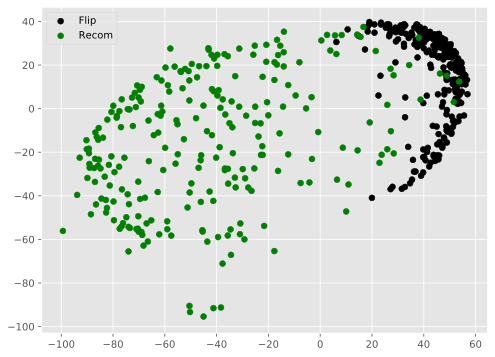

In [24]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig=plt.figure(figsize=(8,6))
plt.scatter(X_MDS_combined[0:250],Y_MDS_combined[0:250],color=['black'])
plt.scatter(X_MDS_combined[250:500],Y_MDS_combined[250:500],color=['green'])
plt.legend(('Flip', 'Recom'), loc='upper left')
fig.savefig('flip_and_recom.png',dpi=300, bbox_inches='tight')

### 4.2 - Recom

In [25]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, metric=True, n_init=4, max_iter=300, verbose=0, eps=0.001, n_jobs=None, random_state=None, dissimilarity='euclidean')

pos2=mds.fit(Distance_matrix_recom).embedding_

import matplotlib.pyplot as plt


X_MDS_iowa_recom=[]
Y_MDS_iowa_recom=[]
for i in range(250):
    X_MDS_iowa_recom.append(pos2[i][0])
    Y_MDS_iowa_recom.append(pos2[i][1])

/anaconda3/envs/VRDI/lib/python3.7/site-packages/sklearn/manifold/mds.py:421: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


### 4.2.1 - MDS visualization for Iowa state, colored by Democratic seats (election 2000) (recom 25000 steps interval 100

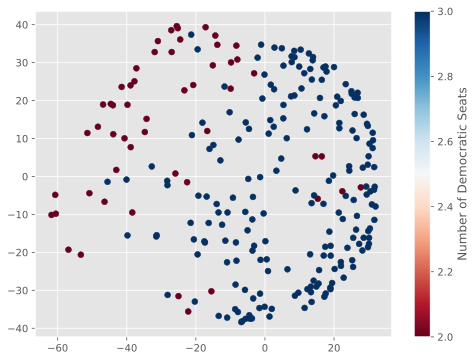

In [26]:
dem_seats_pres00_recom=[]

for i in range(250):
    dem_seats_pres00_recom.append(seats_dem_recom[i][0])
    
fig=plt.figure(figsize=(8,6))
plt.scatter(X_MDS_iowa_recom,Y_MDS_iowa_recom,c=dem_seats_pres00_recom,cmap="RdBu")

plt.colorbar().set_label('Number of Democratic Seats')

fig.savefig('dem_seats_2000.png',dpi=300, bbox_inches='tight')


### 4.2.2 -  MDS visualization for Iowa state, colored by Democratic seats (election 2004) (recom 25000 steps interval 100)

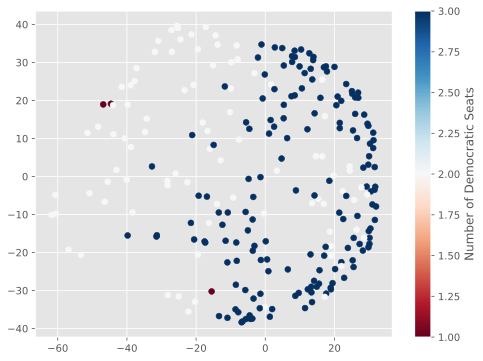

In [27]:
dem_seats_pres04_recom=[]

for i in range(250):
    dem_seats_pres04_recom.append(seats_dem_recom[i][1])
    
fig=plt.figure(figsize=(8,6))
plt.scatter(X_MDS_iowa_recom,Y_MDS_iowa_recom,c=dem_seats_pres04_recom,cmap="RdBu")


plt.colorbar().set_label('Number of Democratic Seats')

fig.savefig('dem_seats_2004.png',dpi=300, bbox_inches='tight')

### 4.2.3 - MDS visualization for Iowa state, colored by Democratic seats (election 2008) (recom 25000 steps interval 100)

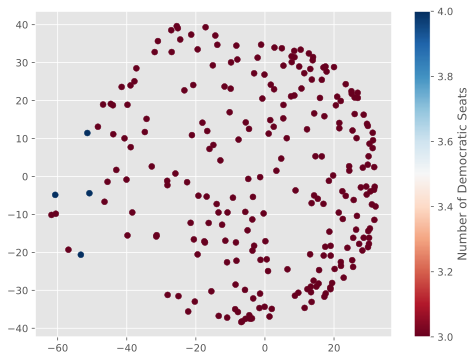

In [28]:
dem_seats_pres08_recom=[]

for i in range(250):
    dem_seats_pres08_recom.append(seats_dem_recom[i][2])
    
fig=plt.figure(figsize=(8,6))
plt.scatter(X_MDS_iowa_recom,Y_MDS_iowa_recom,c=dem_seats_pres08_recom,cmap="RdBu")


plt.colorbar().set_label('Number of Democratic Seats')

fig.savefig('dem_seats_2008.png',dpi=300, bbox_inches='tight')

### 4.2.4 - MDS visualization for Iowa state, colored by Democratic seats (election 2012) (recom 25000 steps interval 100)

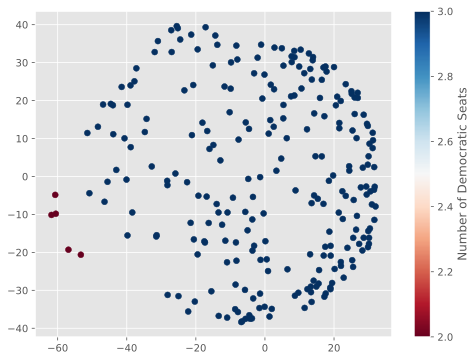

In [29]:
dem_seats_pres12_recom=[]

for i in range(250):
    dem_seats_pres12_recom.append(seats_dem_recom[i][3])
    
fig=plt.figure(figsize=(8,6))
plt.scatter(X_MDS_iowa_recom,Y_MDS_iowa_recom,c=dem_seats_pres12_recom,cmap="RdBu")


plt.colorbar().set_label('Number of Democratic Seats')

fig.savefig('dem_seats_2012.png',dpi=300, bbox_inches='tight')